# Coronavirus tweets NLP

- word cloud
- lda

## Environment

In [1]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Data

In [2]:
df = pd.read_csv('../data/Corona_NLP_filtered.csv')
df.dropna(
    axis = 0, 
    how = "any", 
    inplace = True
)
df.index = np.arange(df.shape[0], dtype = int)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39229 entries, 0 to 39228
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            39229 non-null  object
 1   OriginalTweet         39229 non-null  object
 2   Sentiment             39229 non-null  object
 3   Tweet_filtered        39229 non-null  object
 4   Word_list             39229 non-null  object
 5   Senten_list           39229 non-null  object
 6   Senten_list_filtered  39229 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


## Data cleaning
* Done in data_cleaning

## Word Cloud

### Whole data

In [4]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

train = pd.read_csv('../data/Corona_NLP_train.csv', encoding = 'latin1')
test = pd.read_csv('../data/Corona_NLP_test.csv', encoding = 'latin1')

cv = CountVectorizer(min_df=10, max_df=.3, stop_words = 'english')
train_cv = cv.fit_transform(train['OriginalTweet'])
word_count = train_cv.sum(axis = 0)
word_freq = [(word, word_count[0, idx]) for word, idx in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)

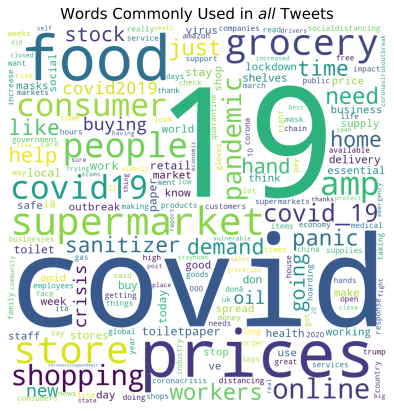

In [5]:
wordcloud = WordCloud(background_color='white',
                      width = 1000, height = 1000).generate_from_frequencies(dict(word_freq))

fig = plt.figure(figsize=(7,7), dpi = 300)
plt.title(f"Words Commonly Used in $all$ Tweets", size=15)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()
fig.savefig('../fig/wc_whole.png')

### Separated

In [7]:
# for label, cmap in zip(['positive', 'negative', 'neutral'],
#                        ['autumn', 'winter', 'summer']):
#     sep = train[train['Sentiment'] == label]['OriginalTweet']
#     cv = CountVectorizer(min_df=10, max_df=.3, stop_words='english')
#     sep_cv = cv.fit_transform(sep)
#     word_count = sep_cv.sum(axis = 0)
#     word_freq = [(word, word_count[0, idx]) for word, idx in cv.vocabulary_.items()]
#     word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    
#     plt.figure(figsize=(6, 3), dpi = 300)
#     wc = WordCloud(width=1000, height=500, background_color='white', colormap=cmap, max_words=100)
#     wc.generate_from_frequencies(dict(word_freq))
#     plt.imshow(wc)
#     plt.axis("off")
#     plt.title(f"Words Commonly Used in ${label}$ Tweets", size=15)
#     plt.show()
#     # savefig('../fig/wc_' + label + '.png')

We observed pretty similar frequent words in both negative and positive wordcloud like food, grocery, prices, which means that people are most concerned about their food supply and grocery price, and the most effective positive aspect of these words might be a sufficient food supply and ample groceries. The supply of daily grocery and their price can effect people on twitter easily. 

## LDA

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=.3, min_df=15, ngram_range=[1, 2], stop_words='english')
train_tfidf = tfidf.fit_transform(train['OriginalTweet'])
train_tfidf.shape

(41157, 7505)

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, n_jobs=-1, random_state=123)
train_lda = lda.fit_transform(train_tfidf)
train_lda.shape

(41157, 10)

In [10]:
vocab = tfidf.get_feature_names()
vocab = [x.replace(' ', '_') for x in vocab]

for topic_idx, topic in enumerate(lda.components_):
    statement = 'Topic {:#2d}: '.format(topic_idx)
    statement += ' '.join([vocab[i] for i in np.argsort(topic)[:-10-1:-1]])
    print(statement)

Topic  0: prices 19 covid covid_19 price amp consumer masks gouging government
Topic  1: consumer covid_19 covid 19 online shopping pandemic retail online_shopping new
Topic  2: food demand panic stock supply buying 19 covid covid_19 panic_buying
Topic  3: store grocery grocery_store supermarket people socialdistancing 19 covid_19 like covid
Topic  4: workers grocery store grocery_store employees thank staff store_workers drivers supermarket
Topic  5: sanitizer hand hand_sanitizer hands supermarket soap covid19 wash use stay
Topic  6: scams scammers ftc 19 covid covid_19 protect store scam information
Topic  7: supermarket people food panic shopping buying 19 covid_19 covid online
Topic  8: toiletpaper toilet paper toilet_paper covid19 covid_19 supermarket shopping online coronavirus_toiletpaper
Topic  9: prices oil 19 covid oil_prices covid_19 consumer impact market pandemic
